# Análise dos Dados Casas de Banglore - *Índia*

*Marcella Café*

<img alt="Bangalore" width="50%" src="https://i.ytimg.com/vi/gH4BqhyTS7A/maxresdefault.jpg">

Quais são as coisas que um potencial comprador de imóvel residencial considera antes de comprar uma casa? A localização, o tamanho da propriedade, a proximidade de escritórios, escolas, parques, restaurantes, hospitais ou a cerca branca estereotipada? E quanto ao fator mais importante - o preço?

Agora, com o impacto prolongado da desmonetização, a aplicação da Lei de Imóveis (Regulamentação e Desenvolvimento) (RERA) e a falta de confiança nos incorporadores imobiliários na cidade, as unidades habitacionais vendidas em toda a Índia em 2017 caíram 7 por cento. Na verdade, os preços dos imóveis em Bengaluru caíram quase 5% no segundo semestre de 2017, segundo um estudo publicado pela consultoria imobiliária Knight Frank.
Por exemplo, para um proprietário em potencial, mais de 9.000 projetos de apartamentos e flats para venda estão disponíveis na faixa de 42-52 lakh, seguidos por mais de 7.100 apartamentos que estão no segmento de orçamento de 52-62 lakh, diz um relatório da propriedade site Makaan. De acordo com o estudo, existem mais de 5.000 projetos no segmento de orçamento de 15-25 lakh, seguidos por aqueles na categoria de orçamento de 34-43 lakh.

Comprar uma casa, especialmente em uma cidade como Bengaluru, é uma escolha complicada. Embora os principais fatores sejam geralmente os mesmos para todas as áreas metropolitanas, há outros a serem considerados para o Vale do Silício da Índia. Com sua ajuda da multidão milenar, cultura vibrante, ótimo clima e uma série de oportunidades de trabalho, é difícil determinar o preço de uma casa em Bengaluru.

In [2]:
ls

 O volume na unidade C � OS
 O N�mero de S�rie do Volume � 364A-7355

 Pasta de c:\Users\marcella\Desktop\Data_Science\data_bengaluru_house

09/04/2021  19:31    <DIR>          .
09/04/2021  19:31    <DIR>          ..
09/04/2021  18:59           578.710 analise_casas.ipynb
09/04/2021  19:32           582.658 analise_casas_copia.ipynb
09/04/2021  19:31             4.407 banglore_home_prices_model.pickle
29/09/2019  08:41           938.020 Bengaluru_House_Data.csv
               4 arquivo(s)      2.103.795 bytes
               2 pasta(s)   11.341.234.176 bytes dispon�veis


In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20, 10)

# Carga de dados

## Armazena os dados carregados em um dataframe

In [2]:

df = pd.read_csv("Bengaluru_House_Data.csv")

# Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

## Dicionário das variáveis

- `area_type`: o tipo do terreno.
- `availability`: se o imóvel já está disponível para mudança logo após a compra.
- `location`: qual a localização do imóvel.
- `size`: quantos quartos possui.
- `society`:
- `total_sqft`: metragem quadrada do imóvel.
- `bath`: quantidade de banheiros disponíveis no imóvel.
- `balcony`: se o imóvel possui sacada.
- `price`: preço do imóvel. 

In [3]:
# Visualizar as 5 primeiras entradas

df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# Verificando o tamanho do dataframe

df.shape

(13320, 9)

In [5]:
# Obtendo um resumo consiso do dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


## Porcentagem dos valores ausentes

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

É possível verificar que a coluna `society` possui 41% dos seus valores faltantes. Já a coluna `balcony` possui 4% dos valores nulos.

In [6]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

society         0.413063
balcony         0.045721
bath            0.005480
size            0.001201
location        0.000075
price           0.000000
total_sqft      0.000000
availability    0.000000
area_type       0.000000
dtype: float64

## Agrupando os dados pela coluna area_type

In [7]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## Descartando colunas que não serão utilizadas no modelo

In [8]:
df_new = df.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns')
df_new.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
# Verificando as colunas que possuem valores nulos

df_new.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
# Considerando que o dataset possui 13320 dados e apenas 73 linhas da coluna bath, 16 linhas da coluna size e uma linha da coluna location apresentam valores faltantes, irei excluir essas linhas com valores faltantes. Essa decisão foi tomada, pois o número de dados faltantes é praticamente insignificante levando em conta o tamanho do dataset.

df_filter = df_new.dropna()
df_filter.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
# Analisando a coluna size

df_filter['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
# Cria uma nova coluna chamada bedroom informando a quantidade de quartos

df_filter['bedroom'] = df_filter['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\marcella\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Visualizando o novo dataset

df_filter.head()

,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
# Valores únicos da coluna bedroom

df_filter['bedroom'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
# Verificando as casas com mais de 20 quartos

df_filter[df_filter.bedroom > 20]

,location,size,total_sqft,bath,price,bedroom
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
# Alguns valores são unitários e outros estão em um intervalo, temos que arrumar isso
df_filter.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
# Verificar se o valor é do tipo float, caso seja retorna True senão False
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True    

In [18]:
# Aplica a função acima e retorna um dataframe com a coluna total_sqft que não tenha um valor do tipo float
df_filter[~df_filter['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bedroom
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


Para tratar esse problema na coluna 'total_sqft' será calculado a média dos valores que apresentam um intervalo como medida (ex: 2100 - 2850) e os valores serão desconsiderados (ex: 34.46Sq. Meter).
Esse tratamento será realizado com a função abaixo.

Uma melhoria futura é converter os valores de metros quadrados para pés quadrados e deixar todos os valores na mesma escala. 


In [19]:
# A função recebe uma string que é dividida pelo caractere '-', caso essa nova variável 'tokens' possuir o tamanho igual a dois cada elemento do token é convertido para um float e é calculado a média entre esses valores. Caso o número não esteja no formato de intervalo, ele será retornado como um float

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [20]:
df_copy = df_filter.copy()
df_copy['total_sqft'] = df_copy['total_sqft'].apply(convert_sqft_to_num)
df_copy.head()

,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
# Verificando a média dos valores do intervalo no id = 30 
convert_sqft_to_num('2100 - 2850')

2475.0

In [22]:
df_copy.iloc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bedroom               4
Name: 30, dtype: object

## Feeture Engineering

Na área imobiliária o preço por metro quadrado é uma variável importante e que pode nos ajudar a encontrar outliers. Portanto, vamos criar essa variável dividindo a variável price pela total_sqft. O preço será multiplicado por 100000 para a moeda ser referente a rúpias.

In [37]:
df5 = df_copy.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
# Verificando a coluna location


len(df5.location.unique())

1304

 Location é uma variável categórica e possui 1304 valores distintos, o que é um valor muito alto e trará problemas de dimensionalidade (serão 1304 novas colunas).

 Existem algumas técnicas para tratar esse problema e reduzir a dimensão.
 A forma que vou utilizar é escolher o valor mínimo de 10 pontos por localização. Desse modo, todas as localizações que possuirem menos de 10 pontos serão marcadas como 'other'.

In [38]:
df5.location = df5.location.apply(lambda x: x.strip())

location_stats = df5.location.value_counts()
location_stats

Whitefield                                  535
Sarjapur  Road                              392
Electronic City                             304
Kanakpura Road                              266
Thanisandra                                 236
Yelahanka                                   210
Uttarahalli                                 186
Hebbal                                      176
Marathahalli                                175
Raja Rajeshwari Nagar                       171
Bannerghatta Road                           152
Hennur Road                                 150
7th Phase JP Nagar                          149
Haralur Road                                141
Electronic City Phase II                    131
Rajaji Nagar                                106
Chandapura                                   98
Bellandur                                    96
Hoodi                                        88
KR Puram                                     88
Electronics City Phase 1                

## Redução de dimensionalidade

Qualquer local com menos de 10 pontos de dados deve ser marcado como "outro" local. Desta forma, o número de categorias pode ser reduzido em grande quantidade. Mais tarde, quando fizermos uma codificação ativa, isso nos ajudará a ter menos colunas fictícias

In [39]:
# Lugares que possuem menos de 10 pontos de dados

len(location_stats[location_stats <= 10])

1052

In [41]:
# Armazenando os lugares que possuem menos de 10 pontos de dados em uma variável chamada 'location_stats_less_than_10'
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

Dodsworth Layout                            10
Sector 1 HSR Layout                         10
Kalkere                                     10
Dairy Circle                                10
Nagappa Reddy Layout                        10
Naganathapura                               10
Nagadevanahalli                             10
Gunjur Palya                                10
Ganga Nagar                                 10
1st Block Koramangala                       10
Sadashiva Nagar                             10
Basapura                                    10
BTM 1st Stage                               10
Mathikere                                    9
KUDLU MAIN ROAD                              9
Vishwanatha Nagenahalli                      9
Vignana Nagar                                9
2nd Phase JP Nagar                           9
Medahalli                                    9
Richmond Town                                9
B Narayanapura                               9
Peenya       

In [35]:
len(df5.location.unique())

1293

In [42]:
# Se x estiver dentro de location_stats_less_than_10 então é classificado com 'other', senão permanece com sua classificação. Desse modo, foi possível diminuir para 242 locais distintos.

df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

## Remoção de Outlier usando lógica de Negócios

Verificando a distribuição das variáveis numéricas

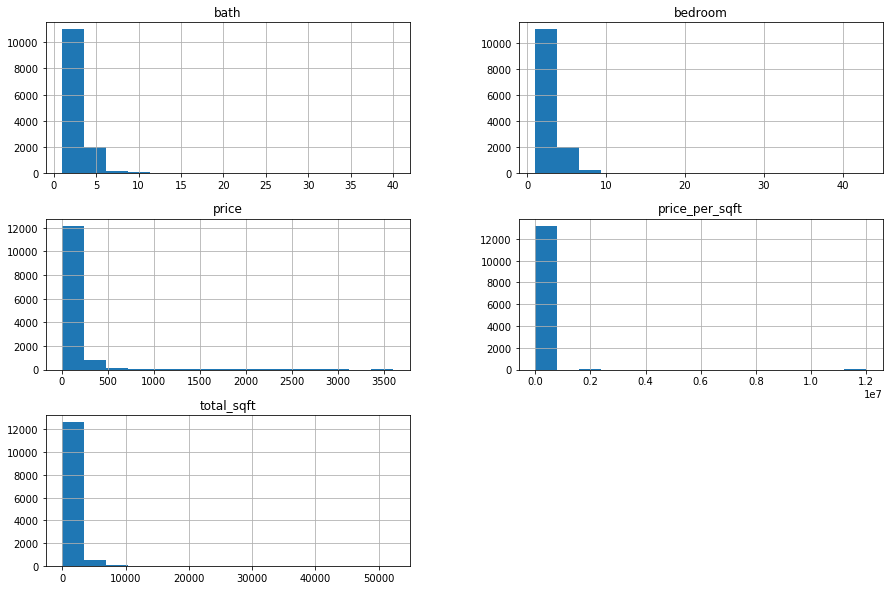

In [43]:
df5.hist(bins=15, figsize=(15,10));

In [44]:
pd.set_option('float_format', '{:f}'.format)

df5[['bath', 'bedroom', 'price', 'price_per_sqft', 'total_sqft']].describe()

,bath,bedroom,price,price_per_sqft,total_sqft
count,13246.000000,13246.000000,13246.000000,13200.000000,13200.000000
mean,2.692586,2.801902,112.389392,7920.759150,1555.302783
std,1.341506,1.295758,149.076587,106727.155209,1237.323445
min,1.000000,1.000000,8.000000,267.829813,1.000000
25%,2.000000,2.000000,50.000000,4267.701345,1100.000000
50%,2.000000,3.000000,72.000000,5438.331478,1275.000000
75%,3.000000,3.000000,120.000000,7317.073171,1672.000000
max,40.000000,43.000000,3600.000000,12000000.000000,52272.000000


É possível perceber alguns valores estranhos com a distribuição e o resumo estatístico acima.

- `price_per_sqft`: o valor mínimo de 267 rúpias é muito improvável por estar com um valor tão baixo. O valor máximo também está muito alto e poderia fazer sentido se fosse em uma área nobre, porém como o modelo construído será um genérico irei removê-lo também.

 

A regra de negócio passada para realizar a análise desses dados foi que normalmente os pés quadrados por quarto são 300 (ou seja, um apartamento de 2 quartos tem no mínimo 600 pés quadrados. Se você tiver, por exemplo, um apartamento com 400 pés quadrados que tenha 2 quartos isso parece suspeito e pode ser removido como um outlier. Removeremos esses outliers mantendo nosso limite por bedroom mínimo em 300 sqft

In [45]:
df5[df5.total_sqft/df5.bedroom<300].head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
9,other,6 Bedroom,1020.000000,6.000000,370.000000,6,36274.509804
45,HSR Layout,8 Bedroom,600.000000,9.000000,200.000000,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.000000,4.000000,150.000000,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.000000,7.000000,85.000000,8,6296.296296
70,other,3 Bedroom,500.000000,3.000000,100.000000,3,20000.000000


Analisando os dados acima nos deparamos com alguns dados estranhos.

ex) total_sqft = 1020 e bedroom = 6. 

- pés quadrados = 170 

Outro exemplo seria:

total_sqft = 600 e bedroom = 8

- pés quadrados = 75

In [46]:
# Removendo os outlier que possuem pés quadrados menor que 300

df6 = df5[~(df5.total_sqft/df5.bedroom<300)]

In [47]:
# Verificando a nova quantidade de dados do dataframe após eliminar os outliers
df6.shape

(12502, 7)

In [48]:
# Removendo valores discrepantes de price_per_sqft ou location
# Encontrar a média o desvio padrão e filtrar os dados estão além do desvio padrão

# Agrupa o dataframe por location e calcula a média e desvio padrão. Filtra os dados que estão além do desvio padrão

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return(df_out)    

In [49]:
# Removendo os outlier referente price_per_sqft

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

Temos que verificar se o preço de apartamentos com 2 quartos é maior do que os apartamentos de 3 quartos.

Foi possível localizar no dataset um caso de 2 apartamentos com o sqft semelhante, um de 1210 sqft e outro de 1268 sqft. Porém, o de 1210 sqft possui 3 quartos e custa 81  e o de 1268 sqft possui 2 quartos e custa 127 lakh e o price_per_sqft é o mesmo nos dois casos. Será que isso ocorreu pela localização do imóvel?

Vamos explorar quantos casos semelhantes a esse existe e tentar entender o que está acontecendo.

In [50]:
# Função para montar um gráfico de dispersão com base no número de quartos (2 ou 3) e a localização do apartamento
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bedroom == 2)]
    bhk3 = df[(df.location==location) & (df.bedroom == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 bedroom')
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color = 'green', label = '3 bedroom', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

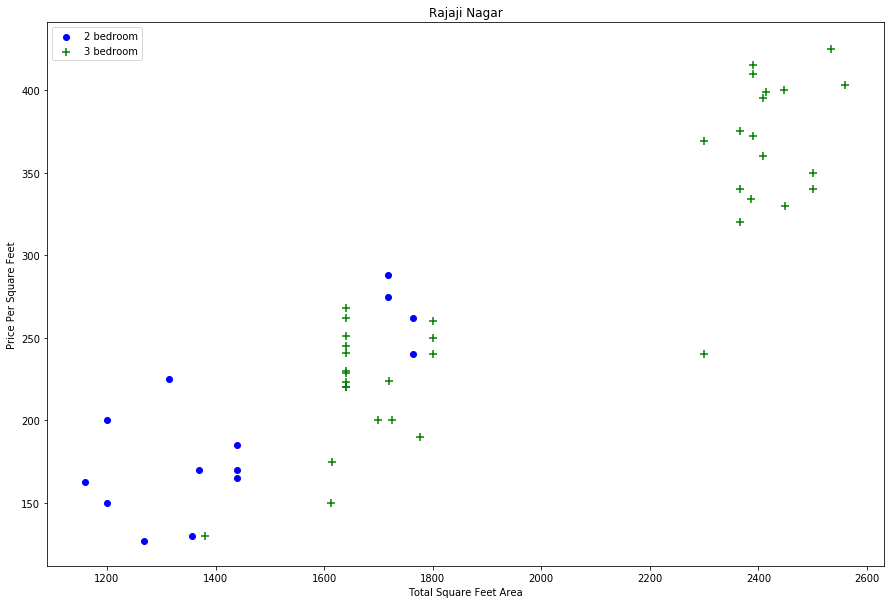

In [51]:
plot_scatter_chart(df7, "Rajaji Nagar")

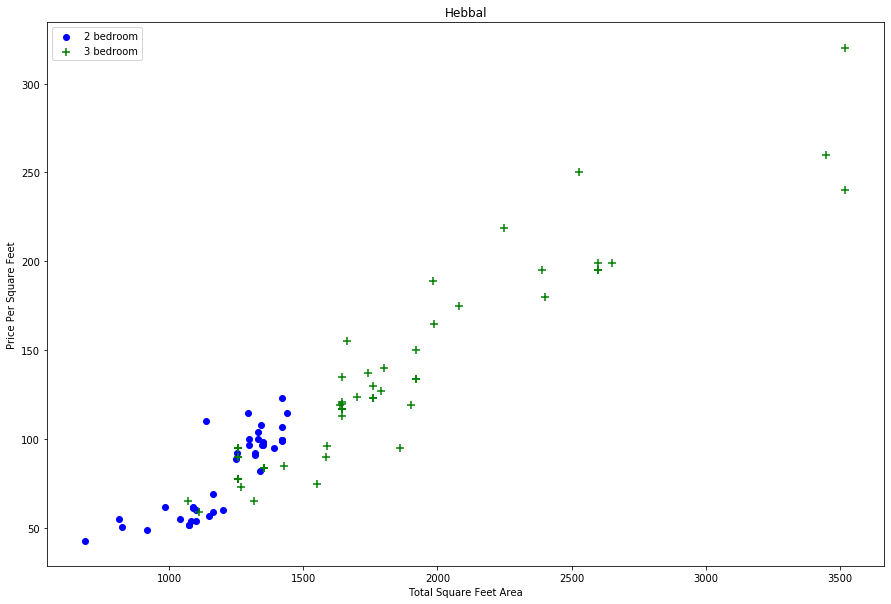

In [52]:
plot_scatter_chart(df7, "Hebbal")

In [53]:
# o primeiro loop calcula a média, desvio padrão e contidade de dados, o segundo exclui os dados onde price_per_sqft é menor que a media de quartos
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedroom'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedroom'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')



In [54]:
df8 = remove_bhk_outliers(df7)
df8.shape


(7329, 7)

Vamos visualizar novamente os 2 gráficos que foram plotados acima referente a price_per_sqft para propriedades com 2 quartos e 3 quartos

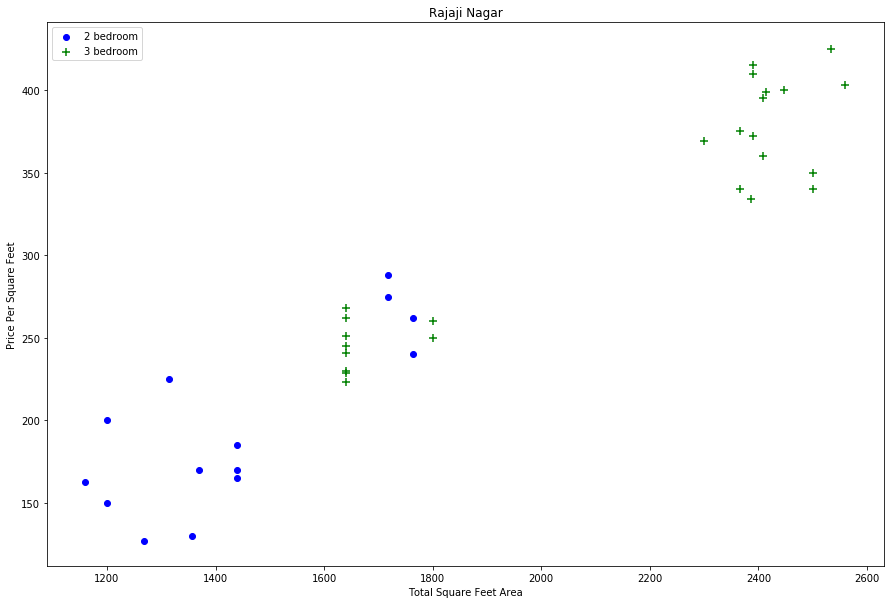

In [55]:
plot_scatter_chart(df8,"Rajaji Nagar")

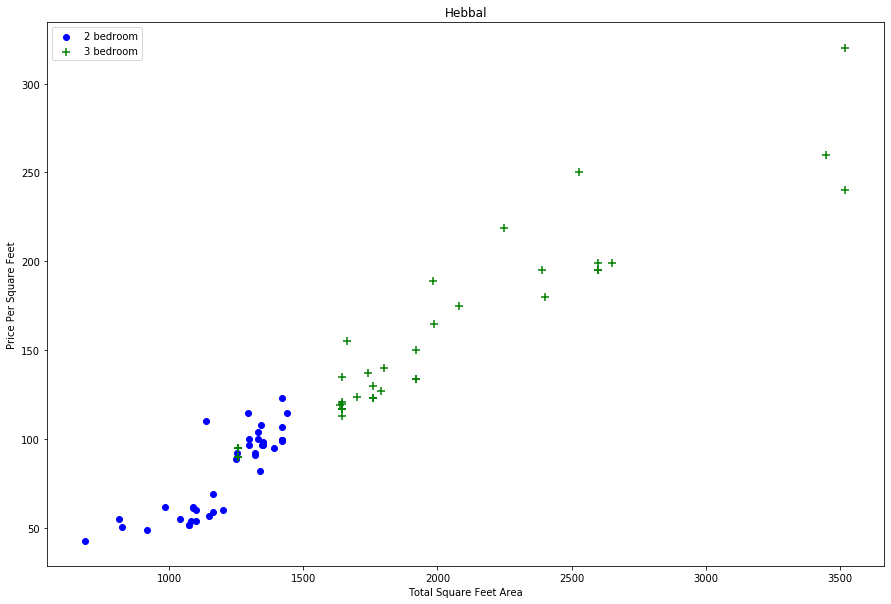

In [56]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'count')

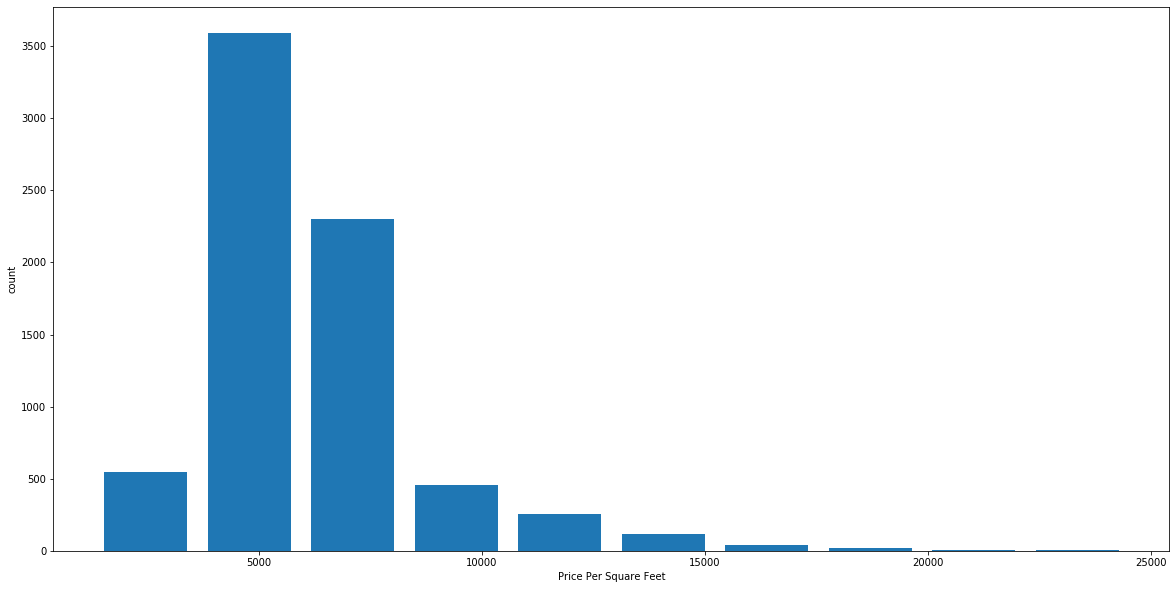

In [57]:
# Histogram price_per_sqft

#import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("count")

- É possível concluir com o histograma acima que a grande maioria do valor de price_per_sqft varia entre 0 e 10000 rúpias
- Possui uma distribuição normal

In [58]:
# Analisando a variável bath

df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [59]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.000000,12.000000,160.000000,10,4000.000000
8486,other,10 BHK,12000.000000,12.000000,525.000000,10,4375.000000
8575,other,16 BHK,10000.000000,16.000000,550.000000,16,5500.000000
9308,other,11 BHK,6000.000000,12.000000,150.000000,11,2500.000000
9639,other,13 BHK,5425.000000,13.000000,275.000000,13,5069.124424


Alguns valores estão estranhos, tendo imóveis que possuem mais banheiros do que quartos. Vamos analisar isso.

Text(0, 0.5, 'Count')

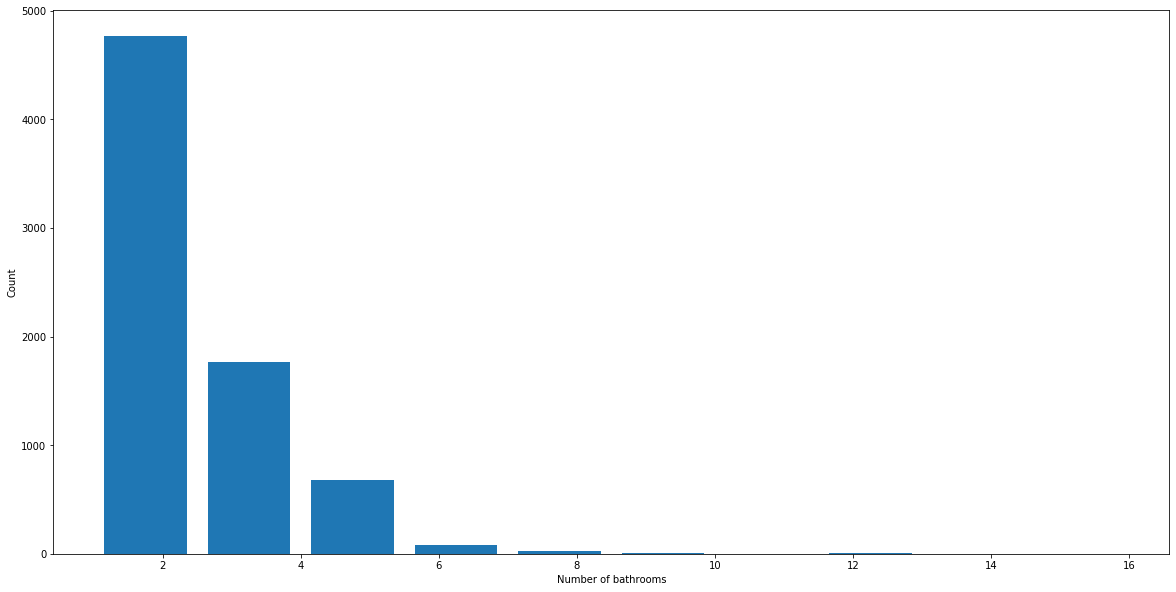

In [60]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

A maioria dos imóveis tem entre 2 e 6 banheiros.
Para fazer a análise foi passada a regra de negócio que um imóvel deve possuir no máximo o número de quartos mais 2. Valores maiores que essa regra serão considerados outliers.
Ou seja, um imóvel com 2 quartos deve possuir no máximo 4 banheiros (2+2), um imóvel com 3 quartos deve possuir no máximo 5 (3+5), e assim sucessivamente.

In [61]:
df8[df8.bath > df8.bedroom + 2]

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.000000,7.000000,80.000000,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.000000,8.000000,450.000000,4,6428.571429
6711,Thanisandra,3 BHK,1806.000000,6.000000,116.000000,3,6423.034330
8411,other,6 BHK,11338.000000,9.000000,1000.000000,6,8819.897689


In [62]:
# Removendo os outlier de bath

df9 = df8[df8.bath < df8.bedroom + 2]
df9.shape

(7251, 7)

Agora que o dataset já está limpo, vou excluir algumas colunas que não serão utilizadas no modelo e que foram importantes para fazer a limpeza dos dados.

In [63]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bedroom
0,1st Block Jayanagar,2850.000000,4.000000,428.000000,4
1,1st Block Jayanagar,1630.000000,3.000000,194.000000,3
2,1st Block Jayanagar,1875.000000,2.000000,235.000000,3
3,1st Block Jayanagar,1200.000000,2.000000,130.000000,3
4,1st Block Jayanagar,1235.000000,2.000000,148.000000,2


## Treinando o Modelo

A coluna location é categórica, então é necessário convertê-la em uma variável numérica para podermos aplicar a regressão. Para isso vamos usar o `one-hot-encoding`.
Para fazer isso será usada a função `get_dummies` que criará uma nova coluna para cada um dos valores distintos contidos na coluna `location`.

In [64]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Concatena o dataset df10 com o dataset dummies com base nas colunas

df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')
df11.head()

,location,total_sqft,bath,price,bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.000000,4.000000,428.000000,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.000000,3.000000,194.000000,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.000000,2.000000,235.000000,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.000000,2.000000,130.000000,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.000000,2.000000,148.000000,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# Apagar a coluna location
df12 = df11.drop('location', axis="columns")
df12.head()

,total_sqft,bath,price,bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.000000,4.000000,428.000000,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.000000,3.000000,194.000000,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.000000,2.000000,235.000000,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.000000,2.000000,130.000000,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.000000,2.000000,148.000000,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df12.shape

(7251, 245)

A variável `x` deve conter apenas variáveis independentes. Que serão todas as variáveis com exceção da variável `price` que é a nossa variável target.

In [68]:
X = df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.000000,4.000000,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.000000,3.000000,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.000000,2.000000,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.000000,2.000000,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.000000,2.000000,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
y = df12.price
y.head()

0   428.000000
1   194.000000
2   235.000000
3   130.000000
4   148.000000
Name: price, dtype: float64

## Dividindo o conjunto de dados

O conjunto de dados será divido em dados de treinamento e de teste. Sendo 20% das amostras para o conjunto de testes e 80% para o conjunto de treino.

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Regressão Linear

In [71]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8452277697874312

## Validação do Modelo

Será feita uma validação cruzada k-fold que é muito utilizada em modelos de predição para avaliar a precisão do nosso modelo de regressão linear.

In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

## Outros Modelos de Regressão

In [74]:
# Executa os 3 modelos e informa qual obtém o melhor resultado

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [75]:
find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687477,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.721169,"{'criterion': 'mse', 'splitter': 'best'}"


Fazendo o treinamento com os modelos de Regressão Linear, Lasso e Árvore de Decisão, foi possível verificar que o modelo de Regressão Linear foi o que obteve melhor desempenho.
Portanto, vamos prever o preço de alguns imóveis com base na localização, metragem, quantidade de banheiros e quarto

In [78]:
# Função para prever o preço do imóvel com base na localização, metragem, quantidade de banheiros e quarto
def predict_price(location, sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]    

In [79]:
# Prevendo o preço de um imóvel em 1st Phase JP Nagar, sqft = 1000, banheiro=2 e quarto=2
predict_price('1st Phase JP Nagar', 1000, 2, 2)

83.4990467717923

In [80]:
# Prevendo o preço de um imóvel em 1st Phase JP Nagar, sqft = 1000, banheiro=3 e quarto=3
predict_price('1st Phase JP Nagar', 1000, 3, 3)

86.80519395205835

In [81]:
# Prevendo o preço de um imóvel em Indira Nagar, sqft = 1000, banheiro=3 e quarto=3
predict_price('Indira Nagar', 1000, 2, 2)

181.2781548400685

In [ ]:
# Prevendo o preço de um imóvel em Indira Nagar, sqft = 1000, banheiro=3 e quarto=3
predict_price('Indira Nagar', 1000, 3, 3)

In [82]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)